In [1]:
%cd CenterNet
%ls

[Errno 2] No such file or directory: 'CenterNet'
/workspace/dev/CenterNet
 LICENSE*       'dev copy.ipynb'   install.txt         src/
 NOTICE*         dev.ipynb         kousoku.jpg*       'test copy.ipynb'
 README.md*      exp/              models/             test.ipynb
 data/           experiments/      readme/            'train copy.ipynb'
 dataset.ipynb   images/           requirements.txt*   train.ipynb


In [2]:
import sys
import os
from os.path import join
sys.path.insert(0, join('/workspace/dev/CenterNet/src/lib'))

from detectors.detector_factory import detector_factory
from models.decode import ctdet_decode
from models.model import create_model
from opts import opts
import torch
import torchvision
from torchvision import transforms
import cv2
import matplotlib.pyplot as plt

import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import os
from PIL import Image
import tqdm
%matplotlib inline

In [138]:
coco = COCO('/workspace/dev/CenterNet/data/coco/annotations/instances_val2017.json')

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


In [63]:
MODEL_PATH = '/workspace/dev/CenterNet/exp/ctdet/CBAM_SPCH/model_70.pth' #モデルのパス
TASK = 'ctdet' 
opt = opts().init('{} --load_model {} --arch resSpattntion_18 --cbam_sp --cbam_ch --keep_res --test_scales 1'.format(TASK, MODEL_PATH).split(' '))
# opt = opts().init('{} --load_model {} --arch resattention --keep_res --test_scales 1'.format(TASK, MODEL_PATH).split(' '))
detector = detector_factory[opt.task](opt)

Keep resolution testing.
training chunk_sizes: [32]
The output will be saved to  /workspace/dev/CenterNet/src/lib/../../exp/ctdet/default
heads {'hm': 80, 'wh': 2, 'reg': 2}
Creating model...
True True
True True
True True
True True
True True
True True
True True
True True
=> loading pretrained model https://download.pytorch.org/models/resnet18-5c106cde.pth
=> init deconv weights from normal distribution
loaded /workspace/dev/CenterNet/exp/ctdet/CBAM_SPCH/model_70.pth, epoch 70


In [331]:
MODEL_PATH = '/workspace/dev/CenterNet/exp/ctdet/resnet/model_last.pth' #モデルのパス
TASK = 'ctdet' 
opt = opts().init('{} --load_model {} --arch resdcn_18 --keep_res --test_scales 1'.format(TASK, MODEL_PATH).split(' '))
# opt = opts().init('{} --load_model {} --arch resattention --keep_res --test_scales 1'.format(TASK, MODEL_PATH).split(' '))
res_18 = detector_factory[opt.task](opt)

Keep resolution testing.
training chunk_sizes: [32]
The output will be saved to  /workspace/dev/CenterNet/src/lib/../../exp/ctdet/default
heads {'hm': 80, 'wh': 2, 'reg': 2}
Creating model...
=> loading pretrained model https://download.pytorch.org/models/resnet18-5c106cde.pth
=> init deconv weights from normal distribution
loaded /workspace/dev/CenterNet/exp/ctdet/resnet/model_last.pth, epoch 140


In [140]:
catIds = coco.getCatIds(catNms=['person']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds );
print(len(imgIds))
img_info = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[1]
2693


In [343]:
ids = []
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
# print(imgIds)
for id in range(len(imgIds)):
    img_info = coco.loadImgs(imgIds[id])[0]
    if img_info["license"] == 4:
        ids.append(img_info["id"])
        
print(len(ids))

479


In [8]:
import numpy as np
np.random.seed(4)
colors = [[np.random.randint(0, 255) for _ in range(3)] for _ in range(80)]

In [77]:
test = "/workspace/38571400851_a387710d3b_c.jpg"

{'license': 4, 'file_name': '000000097679.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000097679.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-15 11:37:24', 'flickr_url': 'http://farm3.staticflickr.com/2215/2727641554_ea1cca26c2_z.jpg', 'id': 97679}
/workspace/dev/CenterNet/data/coco/val2017/000000097679.jpg


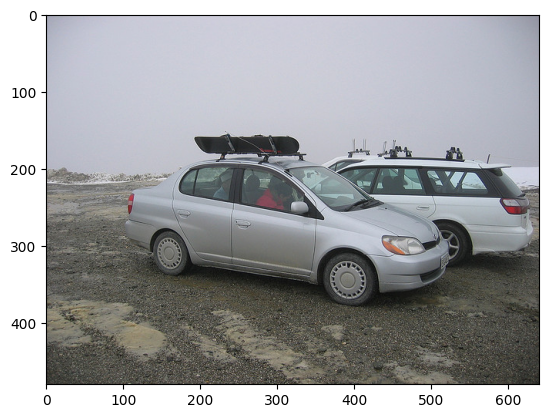

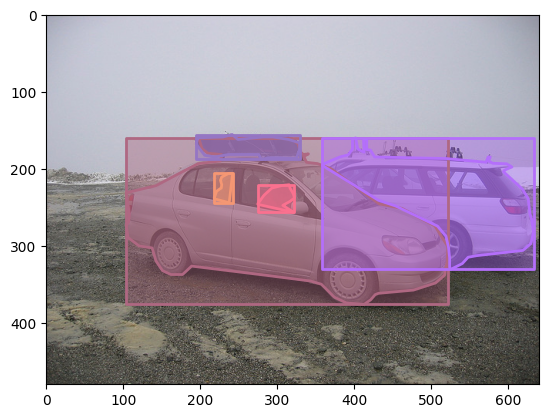

In [329]:
# img_info = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img_info = coco.loadImgs(ids[np.random.randint(0,len(ids))])[0]
img_dir = "/workspace/dev/CenterNet/data/coco/val2017/"
img_path = img_dir+img_info["file_name"]
print(img_info)
print(img_path)
# img_path = test

img = cv2.imread(img_path) 
plt.imshow(img[:,:,::-1])
plt.show()
plt.figure()
plt.imshow(img[:,:,::-1])
annIds = coco.getAnnIds(imgIds=img_info['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)
plt.show()

# rets = detector.run(img_path)['results']
# img = cv2.imread(img_path) 
# for i, ret in rets.items():
#   for rret in ret:
#     if rret[4] > 0.5:
#         cv2.rectangle(img, (int(rret[0]), int(rret[1])), (int(rret[2]), int(rret[3])), [0,0,255], 2)
    
# plt.imshow(img[:,:,::-1])
# plt.show()

# rets = res_18.run(img_path)['results']
# img = cv2.imread(img_path) 
# for i, ret in rets.items():
#   for rret in ret:
#     if rret[4] > 0.5:
#         cv2.rectangle(img, (int(rret[0]), int(rret[1])), (int(rret[2]), int(rret[3])), [0,0,255], 2)
    
# plt.imshow(img[:,:,::-1])
# plt.show()

{'license': 4, 'file_name': '000000389451.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000389451.jpg', 'height': 479, 'width': 640, 'date_captured': '2013-11-17 17:42:07', 'flickr_url': 'http://farm9.staticflickr.com/8216/8336832110_eeb84b1eed_z.jpg', 'id': 389451}
(479, 640, 3)
torch.Size([1, 3, 480, 672])
torch.Size([1, 1, 120, 168])
0.5275847 1.9516554e-12


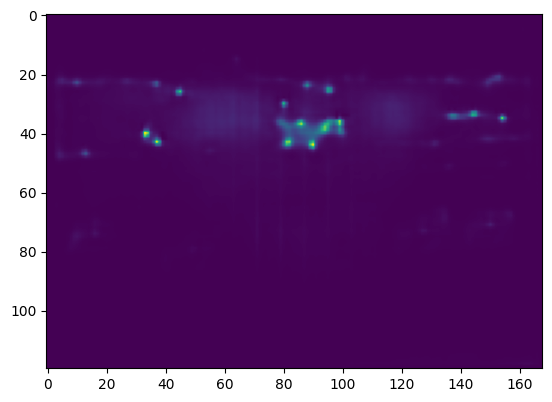

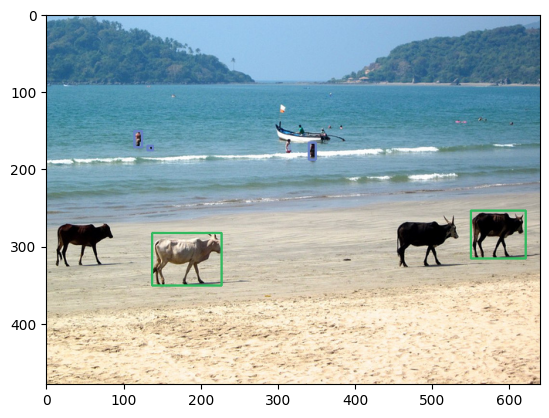

In [396]:
# img_info = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img_info = coco.loadImgs(ids[np.random.randint(0,len(ids))])[0]
print(img_info)
img_dir = "/workspace/dev/CenterNet/data/coco/val2017/"
img_path = img_dir+img_info["file_name"]
img = cv2.imread(img_path)
# img = cv2.imread(test)
print(img.shape)
pre_img, meta = res_18.pre_process(img, 1)
pre_img = pre_img.to(res_18.opt.device)
print(pre_img.shape)
detections = []
with torch.no_grad():
    output = res_18.model(pre_img)[-1]
    hm = output['hm'].sigmoid_()
    inp = hm[0][0:1].unsqueeze(dim=1)
    print(inp.shape)
    res = inp.to('cpu').detach().numpy().copy()[0][0]
    print(np.max(res), np.min(res))
    plt.imshow(res)
    plt.show()
    
#     img = torchvision.utils.make_grid(res[0][0].cpu(), nrow=1, normalize=True, pad_value=1)
#     # テンソル -> PIL Image
#     img = transforms.functional.to_pil_image(img)
#     # リサイズする。
#     new_w = 1000
#     new_h = int(new_w * img.height / img.width)
#     img = img.resize((new_w, new_h))
    
    hm = output["hm"]
    wh = output['wh']
    reg = output['reg'] if res_18.opt.reg_offset else None
    if res_18.opt.flip_test:
        hm = (hm[0:1] + flip_tensor(hm[1:2])) / 2
        wh = (wh[0:1] + flip_tensor(wh[1:2])) / 2
        reg = reg[0:1] if reg is not None else None
    torch.cuda.synchronize()
#     forward_time = time.time()
    dets = ctdet_decode(hm, wh, reg=reg, cat_spec_wh=res_18.opt.cat_spec_wh, K=res_18.opt.K)
    dets = res_18.post_process(dets, meta, 1)
    detections.append(dets)

results = res_18.merge_outputs(detections)

rets = res_18.run(img_path)['results']
img = cv2.imread(img_path) 
for i, ret in rets.items():
  for rret in ret:
    if rret[4] > 0.5:
        cv2.rectangle(img, (int(rret[0]), int(rret[1])), (int(rret[2]), int(rret[3])), colors[i], 2)
    
plt.imshow(img[:,:,::-1])
plt.show()

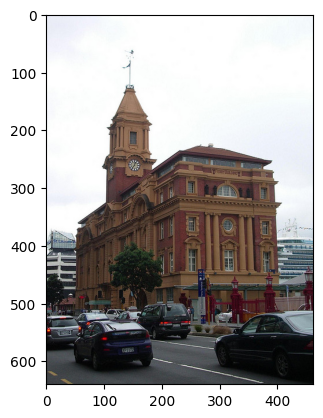

In [101]:
image = cv2.imread("/workspace/dev/CenterNet/data/coco/val2017/000000361142.jpg")
plt.figure()
plt.imshow(image[:,:,::-1])
# catIds = coco.getCatIds(catNms=['car'])
# annIds = coco.getAnnIds(imgIds=361142, catIds=catIds, iscrowd=None)
# anns = coco.loadAnns(annIds)
# coco.showAnns(anns, draw_bbox=True)

In [ ]:
"C:\Users\hyky2\Desktop\研究室\dev\CenterNet\data\coco\val2017\000000000785.jpg"

{'license': 7, 'file_name': '000000567197.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000567197.jpg', 'height': 407, 'width': 500, 'date_captured': '2013-11-15 05:52:31', 'flickr_url': 'http://farm4.staticflickr.com/3044/3110606120_36aa6bdc13_z.jpg', 'id': 567197}
[{'segmentation': [[294.31, 308.34, 321.33, 299.1, 326.3, 292.7, 325.59, 282.74, 350.48, 280.61, 350.48, 261.41, 447.89, 257.15, 445.05, 286.3, 449.31, 301.23, 445.76, 314.74, 431.54, 318.3, 425.85, 323.98, 426.56, 333.23, 415.18, 340.34, 410.92, 340.34, 399.54, 338.2, 386.74, 333.23, 366.83, 330.38, 337.68, 330.38, 327.73, 341.05, 314.22, 342.47, 309.95, 340.34, 305.68, 330.38, 302.13, 330.38, 295.73, 329.67, 290.75, 323.27, 290.04, 319.01, 290.75, 314.74]], 'area': 9297.711150000001, 'iscrowd': 0, 'image_id': 567197, 'bbox': [290.04, 257.15, 159.27, 85.32], 'category_id': 8, 'id': 397564}, {'segmentation': [[202.44, 233.73, 203.36, 232.13, 206.9, 232.24, 207.59, 231.33, 206.9, 227.33, 209.87, 222.87, 214.56,

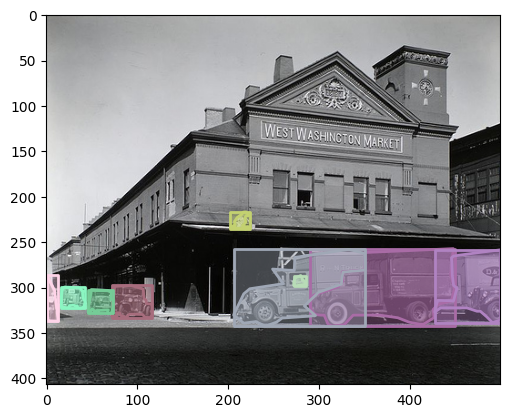

In [4]:
catIds = coco.getCatIds(catNms=['car']);
imgIds = coco.getImgIds(catIds=catIds );
# img_info = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img_info = coco.loadImgs(567197)[0]
print(img_info)
img_dir = "/workspace/dev/CenterNet/data/coco/val2017/"
img = cv2.imread(img_dir+img_info["file_name"])
plt.figure()
plt.imshow(img[:,:,::-1])
annIds = coco.getAnnIds(imgIds=img_info['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns, draw_bbox=True)

In [8]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [785])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img

{'license': 4,
 'file_name': '000000000785.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000000785.jpg',
 'height': 425,
 'width': 640,
 'date_captured': '2013-11-19 21:22:42',
 'flickr_url': 'http://farm8.staticflickr.com/7015/6795644157_f019453ae7_z.jpg',
 'id': 785}

In [5]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

NameError: name 'io' is not defined